# Øving 4, TMA4320

$\newcommand{mb}[1]{\mathbf{#1}}$
$\newcommand{R}{\mathbb{R}}$
    

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

### Oppgave 1
Gitt differensialligningen
$$
y' = ty^2, \qquad y(0)=1. 
$$
skal løses over intervallet $0\leq t \leq 0.4$.

**(a)** Finn den eksakte løsningen av ligningen. 

**Svar:** 
$$ y(t) = \frac{1}{1-\frac12 t^2}. $$

**(b)** Gjør 4 steg med Eulers metode med steglengde $h=0.1$. Beregn feilen i endepunktet.

**(c)** Gjør 2 steg med Heun's metode med steglengde $h=0.2$. Beregn igjen feilen i endepunktet. 

**(d)** Gjør et steg med RK4. Beregn feilen i endepunktet. 

I alle disse tilfellene er det brukt 4 funksjonsevalueringer for å finne en tilnærmelse til løsningen $y(0.4)$. Hvem av metodene ga et mest nøyaktig resultat? 


### Oppgave 3
Duffing-ligningen er en mye studert matematisk modell, som beskriver en tynn, bøyelig metallstav som svinger i nærheten av en elektromagnet. Ligningen er gitt ved

$$
u''+ku' - u(1-u^2)=A\cos(\omega t).
$$

**(a)** Skriv om ligningen til et system av differensialligninger. 

I det resterende kan du bruke parameterne $k=0.25$, $A=0.4$, $\omega = 1.0$, $u(0)=0$, $u'(0)=0$

**(b)** Gjør et steg med Heuns metode. Bruk steglengde $h=0.1$.

**(c)** Løs ligningen numerisk ved hjelp av Heuns metode. Du kan ta utgangspunkt i koden <tt>ode.py</tt>, som du kan finne på forelesningsplanen. Bruk $h=0.01$, og integrer fram til $t_{\text{end}}=100$. Plott begge løsningskomponentene som en funksjon av $t$. Vis deretter løsningen som et faseplott ($u$ på $x$-aksen, $u'$ på $y$-aksen. 

Eksprimenter gjerne med litt ulike startverdier og parameterverdier, men bruk verdiene som er oppgitt i innleveringen.

**(d)** Løs ligningen over samme intervall som du brukte i **(c)**, men nå med <tt> scipy</tt>'s <tt>solve_ivp</tt>. Løs ligningene med litt ulike toleranser (<tt>atol</tt> og <tt>rtol</tt>), og se hva som skjer. 

Duffing-oscillatoren er et eksempel på et kaotisk system. Små endringer kan føre til ganske store endringer i løsningen, men løsningene holder seg likevel innenfor nogenlunde samme område. 






In [2]:
def heun(f, t0, tend, y0, h):
    '''
    Heun's method for solving y'=f(t,y), y(t0)=y0.
    '''
    N = int((tend-t0)/h)        # Number of steps

     
    # In the case of a scalar problem, convert y0 to a numpy vector.
    if not isinstance(y0, np.ndarray): 
        y0 = np.array([y0])
        m = 1
    else:
        m = len(y0)
    
    # Make arrays for storing the solution. 
    ysol = np.zeros((N+1, m))
    ysol[0,:] = y0
    tsol = np.zeros(N+1)
    tsol[0] = t0

    # Main loop
    for n in range(N):
        yn = ysol[n,:]
        tn = tsol[n]
        
        # One step with Heun's method
        k1 = f(tn,yn)
        k2 = f(tn+h, yn+h*k1)
        ynext = yn+0.5*h*(k1+k2)
        tnext = tn+h

        ysol[n+1,:] = ynext
        tsol[n+1] = tnext
  
    # In case of a scalar problem, convert the solution into a 1d-array
    if m==1:
        ysol = ysol[:,0] 

    return tsol, ysol

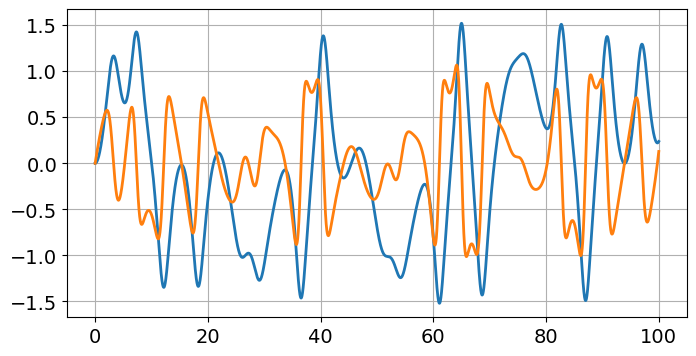

In [3]:
def duffing(t, y):
    k, A, omega = 0.25, 0.4, 1.0
    dy = np.array([y[1], -k*y[1]+y[0]*(1-y[0]**2)+A*np.cos(omega*t)])
    return dy

tend = 100
t0 = 0
y0 =np.array([0.0, 0.0])
tsol, ysol = heun(duffing, t0, tend, y0, h=0.01)

plt.plot(tsol, ysol);    

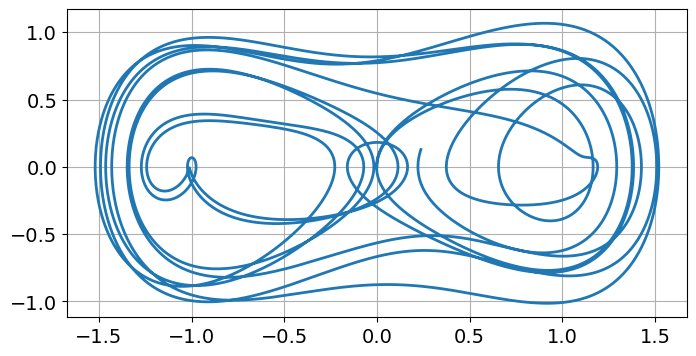

In [4]:
# Faseplott
plt.plot(ysol[:,0],ysol[:,1])  

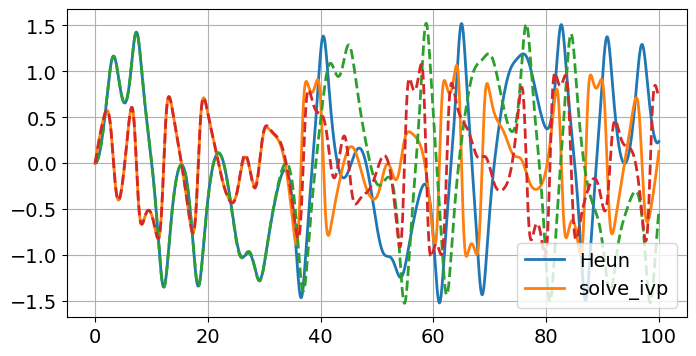

In [5]:
# Oppgave 3d)

from scipy.integrate import solve_ivp
sol = solve_ivp(duffing, [t0, tend], y0, rtol=1.e-8, atol = 1.e-10)
plt.plot(tsol, ysol); 
plt.plot(sol.t, (sol.y).T,'--')
plt.legend(['Heun','solve_ivp'])

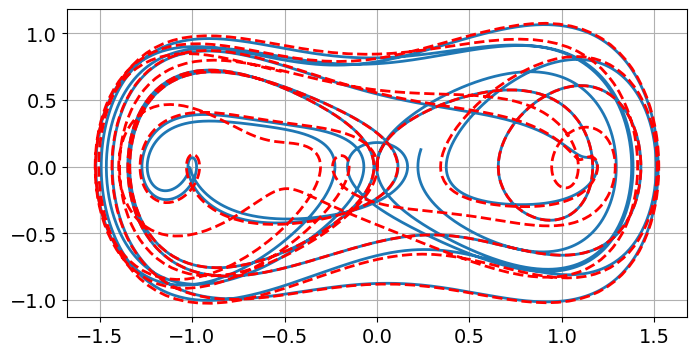

In [6]:
plt.plot(ysol[:,0],ysol[:,1])  
plt.plot(sol.y[0,:],sol.y[1,:],'--r')

### Oppgave 3

Følgende Runge-Kutta metode er gitt ved sitt Butcher-tableau:
$$
\begin{array}{c|ccc}
  0 & 0 \\
  1/3 & 1/3 \\
  2/3 & 0 & 2/3 \\ \hline
      & 1/4 & 0 & 3/4 
\end{array}
$$

**(a)** Bestem metodens orden. 

**(b)** Verifiser metodens orden numerisk. Du kan bruke testligningen fra Oppgave 1. 

**Løsningsforslag**

**(a)** Metoden er av orden 3 (sjekk ordensbetingelsene).

**(b)** Nedenfor er det en enkel implementasjon av metoden for skalare ordinære differensialligninger. 

In [7]:
def rk3(f, t0, y0, tend, N=100):
    '''
    RK3 method for solving y'=f(t,y), y(t0)=y0.
    '''
    h = (tend-t0)/N         # Stepsize

    
    # Make arrays for storing the solution. 
    ysol = np.zeros(N+1)
    tsol = np.zeros(N+1)
    # Insert the initial values
    ysol[0] = y0
    tsol[0] = t0

    tn = t0
    yn = y0

    # Main loop
    for n in range(N):
        # One step of RK3 method
        k1 = f(tn,yn)
        k2 = f(tn+h/3,yn+h*k1/3)
        k3 = f(tn+2*h/3,yn+2*h*k2/3)
        yn = yn+0.25*h*(k1+3*k3)
        tn = tn+h

        # Store the solution
        ysol[n+1] = yn
        tsol[n+1] = tn

    return tsol, ysol
# end of rk3

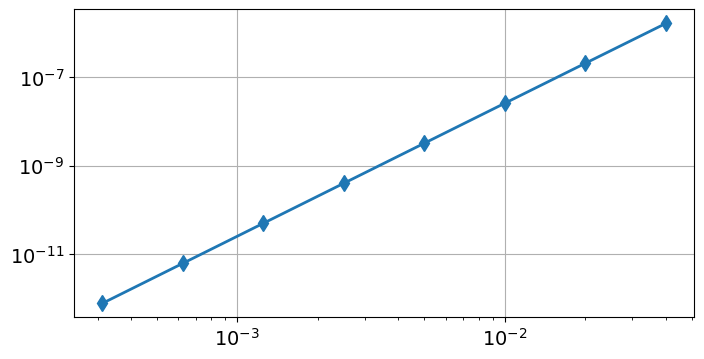

In [8]:
def f(t,y):    
    # The test problem
    return t*y**2

t0, y0 = 0.0, 1.0
tend = 0.4
yex = 1.0/(1-0.5*tend**2)   # Exact solution at tend

M = 8   # Number of times the stepsize is reduced by a factor 1/2.
hsteps = np.zeros(M)  # Store stepsizes
errors = np.zeros(M)  # Store errors

N = 10    # Number of steps.
for m in range(M):
    tsol,ysol = rk3(f, t0, y0, tend, N)
    hsteps[m] = (tend-t0)/N
    errors[m] = np.abs(ysol[-1]-yex)
    N = 2*N
    
# Make a log-log plot of the error vs. stepsizes
plt.loglog(hsteps, errors,'d-')

Anta at $|e(h)| \approx C h^p$, ta logaritmen på begge sider gir 

$$
\log|e(h)| \approx \log{C} + p \cdot \log{h} 
$$

og vi kan finne et estimat for ordenen $p$ ved [lineær regresjon](https://tma4245.math.ntnu.no/enkel-lineær-regresjon/minste-kvadraters-metode/)

In [9]:
def mkm(x,y):
    # Minste kvadraters metode
    n = len(x)
    xbar = np.sum(x)/n
    ybar = np.sum(y)/n
    beta1 = np.sum((x-xbar)*y)/np.sum((x-xbar)**2)
    beta0 = ybar - beta1*xbar
    return beta0, beta1

logC_est, p_est = mkm(np.log(hsteps),np.log(errors))
print(f'Metodens orden er målt til {p_est:.2f}.')

Metodens orden er målt til 3.00.
